<a href="https://colab.research.google.com/github/GaneshRaja01/Data-Science-Final-Project/blob/main/Tesla_stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## Installing yahoo finance
!pip install yfinance
!pip install pmdarima

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from pmdarima import auto_arima
import pmdarima as pm

#Data collection

In [ ]:
#Data collecting from yahoo finance
df_tesla = yf.download('TSLA', start= '2019-01-01', end='2024-09-30')

[*********************100%***********************]  1 of 1 completed


In [ ]:
df_tesla.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,,
2019-01-02,20.674667,20.674667,21.008667,19.920000,20.406668,174879000
2019-01-03,20.024000,20.024000,20.626667,19.825333,20.466667,104478000
2019-01-04,21.179333,21.179333,21.200001,20.181999,20.400000,110911500
2019-01-07,22.330667,22.330667,22.449333,21.183332,21.448000,113268000
2019-01-08,22.356667,22.356667,22.934000,21.801332,22.797333,105127500


In [ ]:
df_tesla.tail()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,,
2024-09-23,250.000000,250.000000,250.000000,241.919998,242.610001,86927200
2024-09-24,254.270004,254.270004,257.190002,249.050003,254.080002,88491000
2024-09-25,257.019989,257.019989,257.049988,252.279999,252.539993,65034300
2024-09-26,254.220001,254.220001,261.750000,251.529999,260.600006,67142200
2024-09-27,260.459991,260.459991,260.700012,254.119995,257.380005,70988100


<Axes: title={'center': 'Tesla Stock Price'}, xlabel='Date', ylabel='Price ($)'>

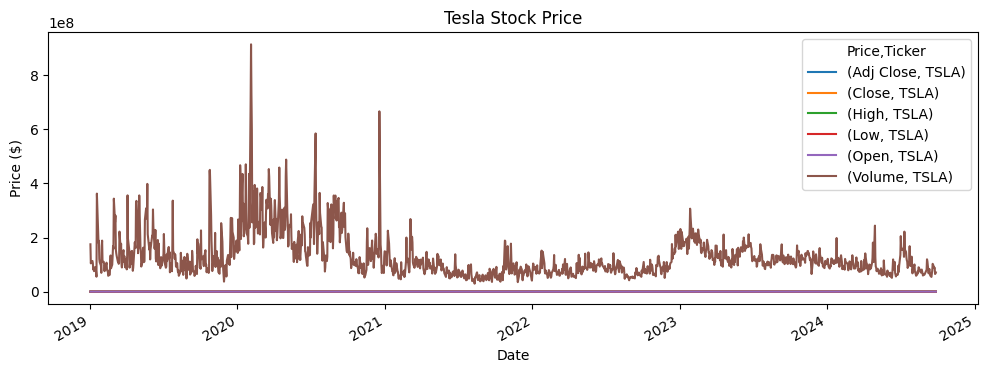

In [ ]:
df_tesla.plot(figsize=(12,4), title='Tesla Stock Price', ylabel='Price ($)', xlabel='Date', kind='line')

#EDA and Preprocessing part for ARIMA

<Axes: xlabel='Date'>

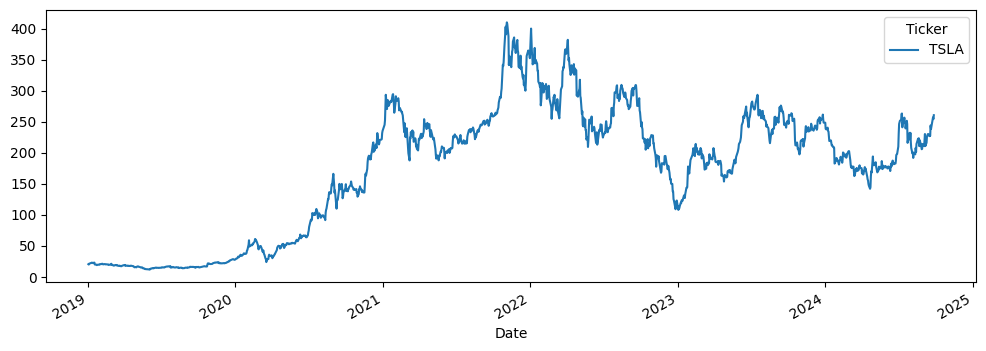

In [ ]:
df_tesla['Close'].plot(figsize=(12,4))

In [ ]:
#Checking missing values
df_tesla.isnull().sum()
df_tesla.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1445 entries, 2019-01-02 to 2024-09-27
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, TSLA)  1445 non-null   float64
 1   (Close, TSLA)      1445 non-null   float64
 2   (High, TSLA)       1445 non-null   float64
 3   (Low, TSLA)        1445 non-null   float64
 4   (Open, TSLA)       1445 non-null   float64
 5   (Volume, TSLA)     1445 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 79.0 KB


In [ ]:
#Finding number of duplicates
duplicates = df_tesla.duplicated()
print('Number of duplicate rows = %d' % (duplicates.sum()))

Number of duplicate rows = 0


In [ ]:
## Datetime Index
df_tesla.index

DatetimeIndex(['2019-01-02', '2019-01-03', '2019-01-04', '2019-01-07',
               '2019-01-08', '2019-01-09', '2019-01-10', '2019-01-11',
               '2019-01-14', '2019-01-15',
               ...
               '2024-09-16', '2024-09-17', '2024-09-18', '2024-09-19',
               '2024-09-20', '2024-09-23', '2024-09-24', '2024-09-25',
               '2024-09-26', '2024-09-27'],
              dtype='datetime64[ns]', name='Date', length=1445, freq=None)

In [ ]:
df_tesla.index = pd.to_datetime(df_tesla.index)

Time Resampling

In [ ]:
df_tesla.resample(rule='M').mean()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,,
2019-01-31,21.232952,21.232952,21.567587,20.697301,21.112730,1.254658e+08
2019-02-28,20.515228,20.515228,20.783614,20.173825,20.479789,1.014869e+08
2019-03-31,18.517143,18.517143,18.848412,18.229968,18.591397,1.527096e+08
2019-04-30,17.777048,17.777048,18.054222,17.487746,17.801175,1.648195e+08
2019-05-31,14.647697,14.647697,14.953273,14.359667,14.702424,1.926810e+08
...,...,...,...,...,...,...
2024-05-31,177.231819,177.231819,180.495909,174.195908,177.504091,7.582640e+07
2024-06-30,182.220000,182.220000,185.694737,178.811053,181.914210,7.405459e+07


<Axes: xlabel='Date'>

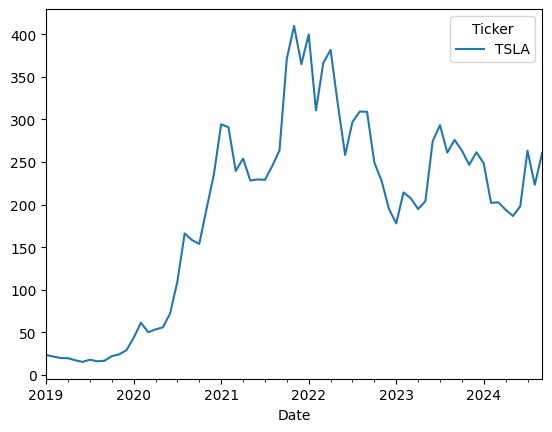

In [ ]:
##Monthly start frequency
##https://towardsdatascience.com/resample-function-of-pandas-79b17ec82a78
df_tesla.resample(rule='M').max()['Close'].plot()

<Axes: xlabel='Date'>

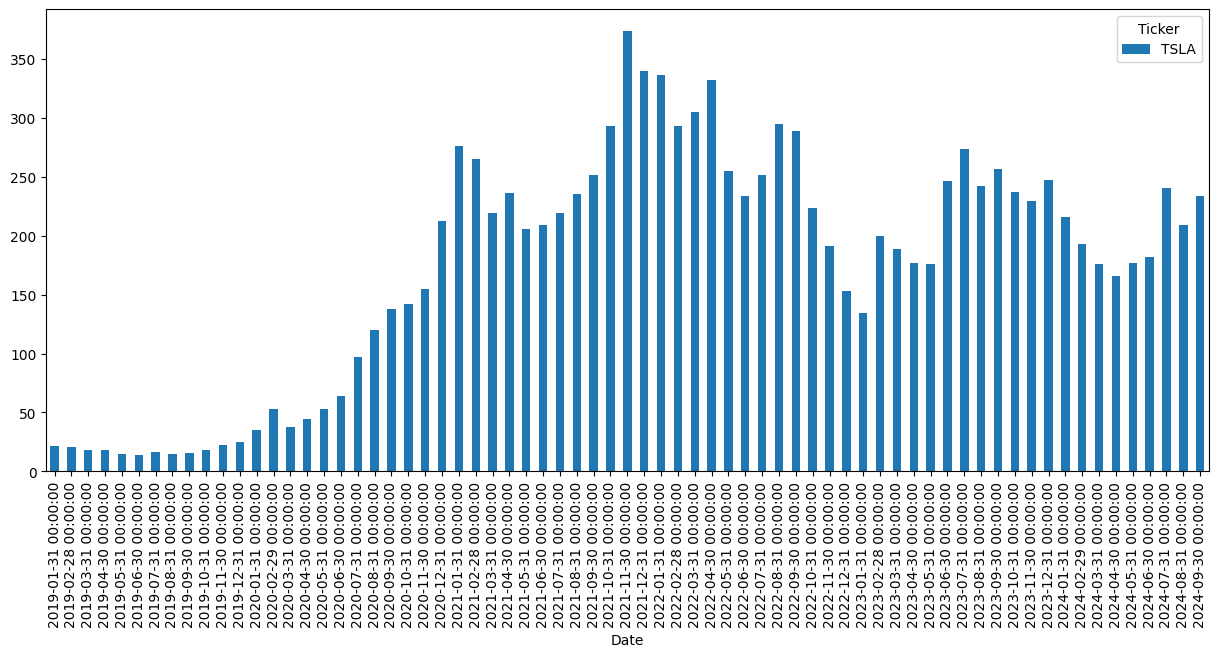

In [ ]:
##plotting
df_tesla['Close'].resample(rule='M').mean().plot(kind='bar',figsize=(15,6))

In [ ]:
df_tesla_resam = df_tesla.resample(rule='M').mean()

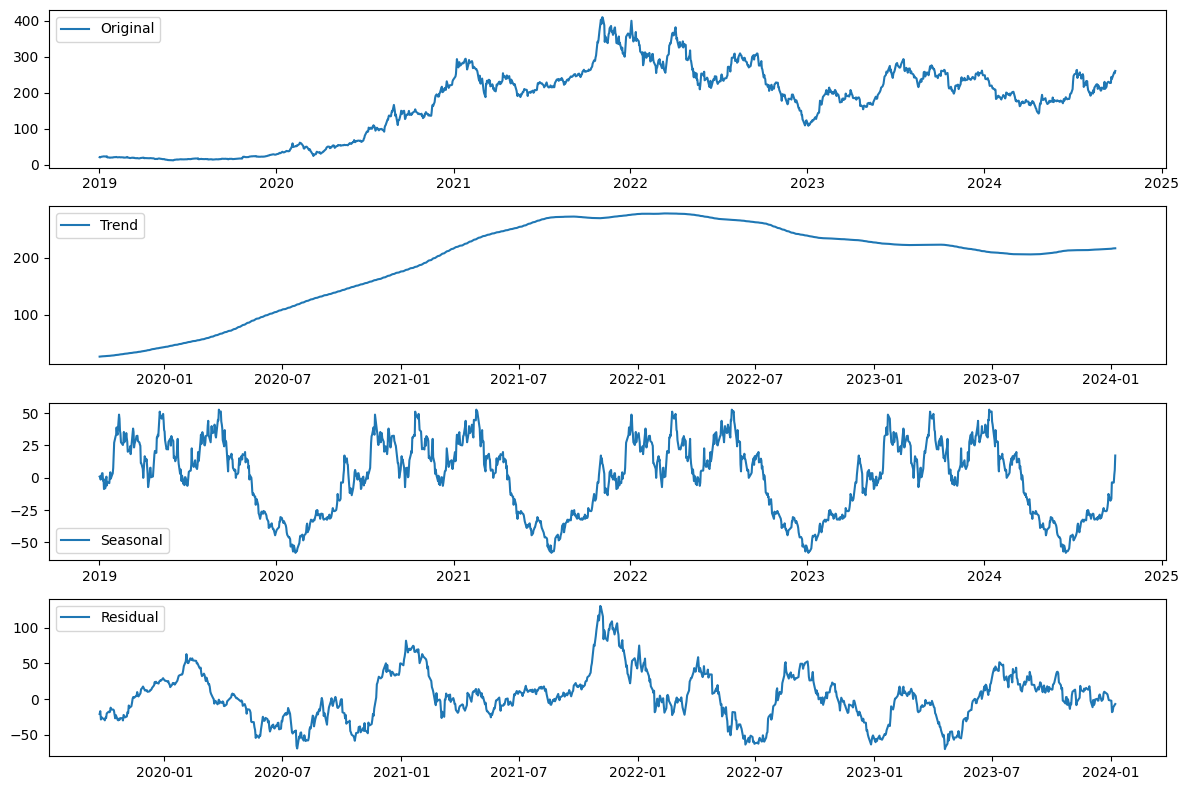

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the series with model add
decomposition_add  = seasonal_decompose(df_tesla['Close'], model='additive', period=365)

trend_add = decomposition_add.trend
seasonal_add = decomposition_add.seasonal
residual_add = decomposition_add.resid

plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(df_tesla['Close'], label='Original')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(trend_add, label='Trend')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(seasonal_add, label='Seasonal')
plt.legend(loc='lower left')

plt.subplot(414)
plt.plot(residual_add, label='Residual')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

#Check Stationarity

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
adf_test = adfuller(df_tesla_resam['Close'])

In [ ]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [ ]:
adf_test(df_tesla_resam['Close'].dropna())

ADF Statistics: -1.6329848116940309
p- value: 0.46592873302451
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [ ]:
## Use Techniques differencing
df_tesla_diff = df_tesla_resam['Close'].diff().dropna()
df_tesla_diff.head()

Ticker,TSLA
Date,
2019-02-28,-0.717725
2019-03-31,-1.998085
2019-04-30,-0.740095
2019-05-31,-3.129350
2019-06-30,-0.399930


In [ ]:
adf_test(df_tesla_diff.dropna())

ADF Statistics: -7.220724481011202
p- value: 2.1148559609065778e-10
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

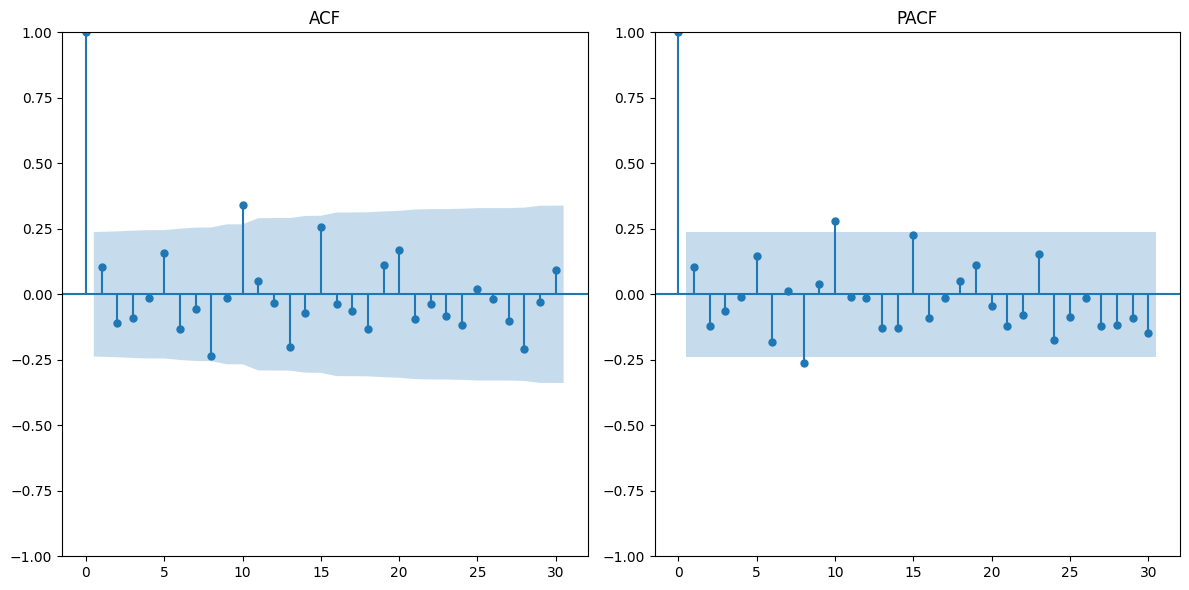

In [ ]:
# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(df_tesla_diff.dropna(), lags=30, ax=plt.gca())
plt.title("ACF")

plt.subplot(122)
plot_pacf(df_tesla_diff.dropna(), lags=30, ax=plt.gca())
plt.title("PACF")
plt.tight_layout()
plt.show()

Finding the parameters

In [ ]:
# Fit auto_arima model
auto_model = pm.auto_arima(df_tesla_diff, seasonal=False, trace=True, error_action='ignore', suppress_warnings=True)

# Print model summary
print(auto_model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=1.35 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=658.203, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=659.322, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=659.112, Time=0.34 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=0.54 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=659.468, Time=0.02 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 2.391 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   68
Model:                        SARIMAX   Log Likelihood                -328.102
Date:                Mon, 06 Jan 2025   AIC                            658.203
Time:                        10:09:03   BIC                            660.423
Sample:                    02-28-2019   HQIC                           659.083
                        

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import itertools

In [ ]:
# Ensure the index is a datetime index for time series analysis
df_tesla_diff.index = pd.to_datetime(df_tesla_diff.index)

In [ ]:
# Define the p, d, q parameters
p = range(0, 4)
d = range(0, 2)
q = range(0, 4)

In [ ]:
# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

In [ ]:
# Initialize variables to store the best parameters and corresponding AIC
best_aic = float("inf")
best_pdq = None

# Grid Search
for param in pdq:
    try:
        model = ARIMA(df_tesla_diff, order=param)
        results = model.fit()
        if results.aic < best_aic:
            best_aic = results.aic
            best_pdq = param
        print(f'ARIMA{param} - AIC:{results.aic}')
    except:
        continue

print(f'Best ARIMA parameters: {best_pdq} with AIC: {best_aic}')

ARIMA(0, 0, 0) - AIC:659.4682910652383
ARIMA(0, 0, 1) - AIC:660.5130713566097
ARIMA(0, 0, 2) - AIC:661.7347715568084
ARIMA(0, 0, 3) - AIC:663.6580474985719
ARIMA(0, 1, 0) - AIC:687.5207440750384
ARIMA(0, 1, 1) - AIC:655.0424606026902
ARIMA(0, 1, 2) - AIC:655.8428315220796
ARIMA(0, 1, 3) - AIC:657.3203496055717
ARIMA(1, 0, 0) - AIC:660.7169317916367
ARIMA(1, 0, 1) - AIC:657.6580839812408
ARIMA(1, 0, 2) - AIC:663.5290029271707
ARIMA(1, 0, 3) - AIC:661.5984122493106
ARIMA(1, 1, 0) - AIC:679.430702283014
ARIMA(1, 1, 1) - AIC:656.0651116235648
ARIMA(1, 1, 2) - AIC:653.1084512525734
ARIMA(1, 1, 3) - AIC:655.1076135055577
ARIMA(2, 0, 0) - AIC:661.6868218027552
ARIMA(2, 0, 1) - AIC:663.5219928072918
ARIMA(2, 0, 2) - AIC:660.8252113782762
ARIMA(2, 0, 3) - AIC:662.1183270419066
ARIMA(2, 1, 0) - AIC:673.865054609234
ARIMA(2, 1, 1) - AIC:657.2638077789803
ARIMA(2, 1, 2) - AIC:655.1046907585617
ARIMA(2, 1, 3) - AIC:655.632600520841
ARIMA(3, 0, 0) - AIC:663.4535190526319
ARIMA(3, 0, 1) - AIC:665.452

In [ ]:
#Train-Test Split
train_size = int(len(df_tesla_diff) * 0.8)
#test_size = len(df_tesla_diff) - train_size
train_data, test_data = df_tesla_diff[:train_size], df_tesla_diff[train_size:]

In [ ]:
#Fitting ARIMA Model
# Using grid search p, d, q values
model = ARIMA(train_data, order=(1, 1, 2))
arima_result = model.fit()

# Display Model Summary
print(arima_result.summary())

                               SARIMAX Results                                
Dep. Variable:                   TSLA   No. Observations:                   54
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -257.103
Date:                Mon, 06 Jan 2025   AIC                            522.205
Time:                        10:09:29   BIC                            530.086
Sample:                    02-28-2019   HQIC                           525.236
                         - 07-31-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6967      0.194     -3.593      0.000      -1.077      -0.317
ma.L1         -0.0560      1.833     -0.031      0.976      -3.650       3.538
ma.L2         -0.9416      1.735     -0.543      0.5

In [ ]:
#Test data Forecasting
forecast = arima_result.forecast(steps=len(test_data))

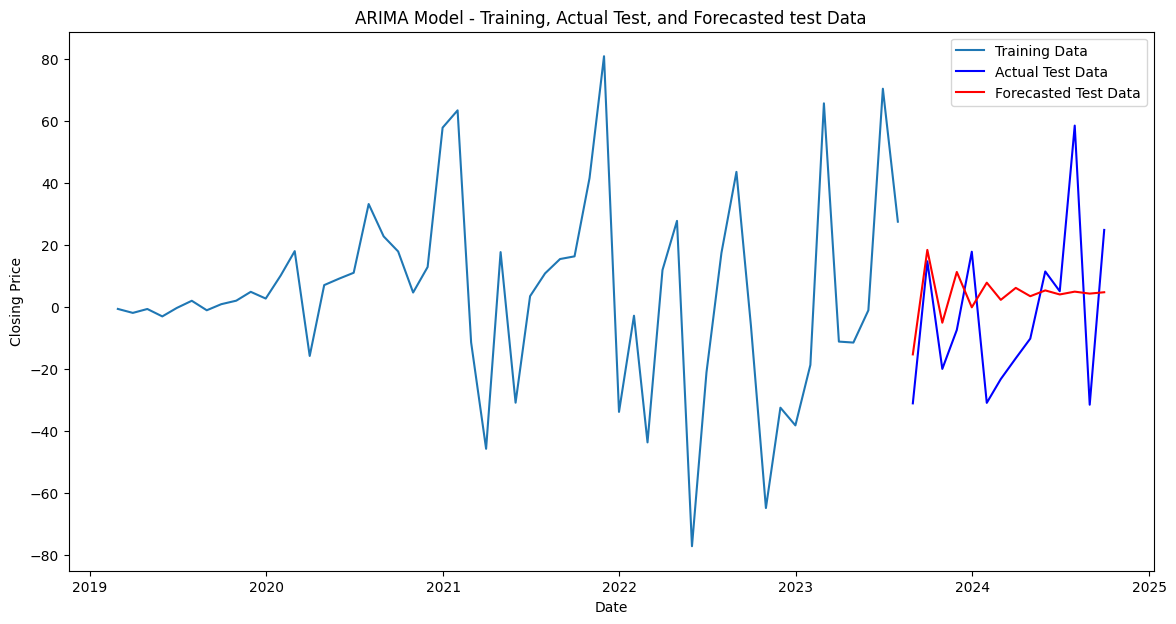

In [ ]:
# Plotting
plt.figure(figsize=(14, 7))
plt.plot(train_data, label="Training Data")
plt.plot(test_data, label="Actual Test Data", color='blue')
plt.plot(forecast, label="Forecasted Test Data", color='red')
plt.legend()
plt.title("ARIMA Model - Training, Actual Test, and Forecasted test Data")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.show()

In [ ]:
# Calculate metrics
rmse_arima = np.sqrt(mean_squared_error(test_data, forecast))
mae_arima = mean_absolute_error(test_data, forecast)
mape_arima = mean_absolute_percentage_error(test_data, forecast)

# Print the results
print(f"ARIMA Model Evaluation Metrics:")
print(f"Root Mean Squared Error (RMSE): {rmse_arima}")
print(f"Mean Absolute Error (MAE): {mae_arima}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_arima * 100:.2f}%")


ARIMA Model Evaluation Metrics:
Root Mean Squared Error (RMSE): 24.79247021656287
Mean Absolute Error (MAE): 20.591726201920416
Mean Absolute Percentage Error (MAPE): 97.52%



#LSTM

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler

# Data preprocessing for LSTM

In [ ]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# data_scaled = scaler.fit_transform(df_tesla_resam['Close'].values.reshape(-1,1))

# Data preprocessing for LSTM
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(df_tesla_resam['Close'].values.reshape(-1,1))

In [ ]:
# Splitting data into train and test - assuming 80/20
train_size_lstm = int(len(data_scaled) * 0.8)
#test_size_lstm = len(data_scaled) - train_size_lstm
train_lstm, test_lstm = data_scaled[0:train_size_lstm, :], data_scaled[train_size_lstm:len(data_scaled), :]

In [ ]:
# Convert an array of values into a dataset matrix
def prepare_data(dataset, time_steps=1):
    X, Y = [], []
    for i in range(len(dataset)-time_steps-1):
        a = dataset[i:(i+time_steps), 0]
        X.append(a)
        Y.append(dataset[i + time_steps, 0])
    return np.array(X), np.array(Y)

In [ ]:
# Reshape into X=t and Y=t+1
time_steps = 1
trainX, trainY = prepare_data(train_lstm, time_steps)
testX, testY = prepare_data(test_lstm, time_steps)

# Reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [ ]:
# Build the LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(4, input_shape=(1, time_steps)))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mean_squared_error', optimizer='adam')
model_lstm.fit(trainX, trainY, epochs=50, batch_size=1, verbose=2)

Epoch 1/50
53/53 - 1s - 26ms/step - loss: 0.2747
Epoch 2/50
53/53 - 0s - 2ms/step - loss: 0.2178
Epoch 3/50
53/53 - 0s - 3ms/step - loss: 0.1711
Epoch 4/50
53/53 - 0s - 3ms/step - loss: 0.1312
Epoch 5/50
53/53 - 0s - 3ms/step - loss: 0.1004
Epoch 6/50
53/53 - 0s - 3ms/step - loss: 0.0795
Epoch 7/50
53/53 - 0s - 3ms/step - loss: 0.0668
Epoch 8/50
53/53 - 0s - 2ms/step - loss: 0.0595
Epoch 9/50
53/53 - 0s - 2ms/step - loss: 0.0542
Epoch 10/50
53/53 - 0s - 2ms/step - loss: 0.0502
Epoch 11/50
53/53 - 0s - 3ms/step - loss: 0.0464
Epoch 12/50
53/53 - 0s - 2ms/step - loss: 0.0430
Epoch 13/50
53/53 - 0s - 2ms/step - loss: 0.0396
Epoch 14/50
53/53 - 0s - 3ms/step - loss: 0.0367
Epoch 15/50
53/53 - 0s - 3ms/step - loss: 0.0334
Epoch 16/50
53/53 - 0s - 3ms/step - loss: 0.0305
Epoch 17/50
53/53 - 0s - 3ms/step - loss: 0.0278
Epoch 18/50
53/53 - 0s - 2ms/step - loss: 0.0252
Epoch 19/50
53/53 - 0s - 2ms/step - loss: 0.0226
Epoch 20/50
53/53 - 0s - 2ms/step - loss: 0.0203
Epoch 21/50
53/53 - 0s - 3ms

In [ ]:
# Invert predictions
trainPredict = scaler.inverse_transform(model_lstm.predict(trainX))
testPredict = scaler.inverse_transform(model_lstm.predict(testX))
trainY = scaler.inverse_transform([trainY])
testY = scaler.inverse_transform([testY])

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


In [ ]:
trainPredictPlot = np.empty_like(data_scaled)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[time_steps:len(trainPredict)+time_steps, :] = trainPredict

In [ ]:
testPredictPlot = np.empty_like(data_scaled)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(time_steps*2)+1:len(data_scaled)-1, :] = testPredict

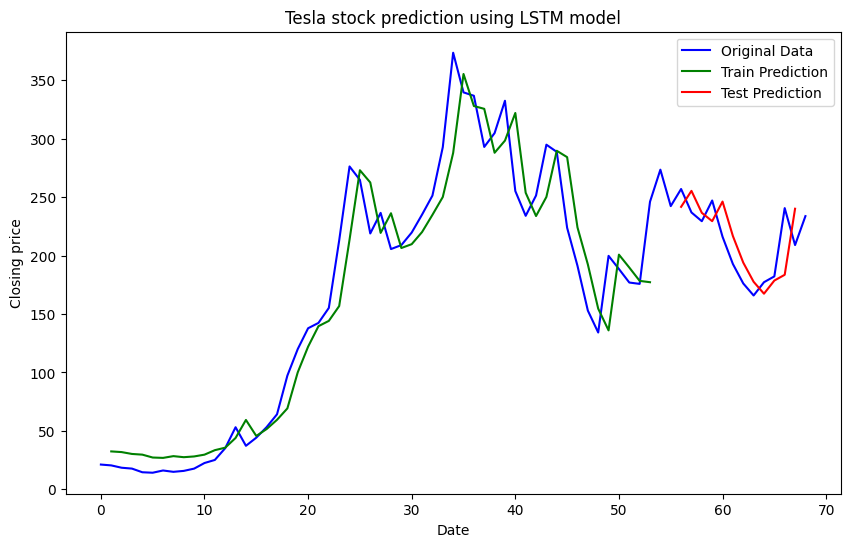

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(scaler.inverse_transform(data_scaled), label='Original Data', color='blue')
plt.plot(trainPredictPlot, label='Train Prediction', color='green')
plt.plot(testPredictPlot, label='Test Prediction', color='red')
plt.title('Tesla stock prediction using LSTM model')
plt.xlabel('Date')
plt.ylabel('Closing price')
plt.legend()
plt.show()

In [ ]:
#Calculate metrics
rmse_lstm = np.sqrt(mean_squared_error(testY[0], testPredict[:, 0]))
mae_lstm = mean_absolute_error(testY[0], testPredict[:, 0])
mape_lstm = mean_absolute_percentage_error(testY[0], testPredict[:, 0])
# Print the results
print(f"LSTM Model Evaluation Metrics:")
print(f"Root Mean Squared Error (RMSE): {rmse_lstm}")
print(f"Mean Absolute Error (MAE): {mae_lstm}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_lstm * 100:.2f}%")

LSTM Model Evaluation Metrics:
Root Mean Squared Error (RMSE): 24.493677852131565
Mean Absolute Error (MAE): 20.30328967703623
Mean Absolute Percentage Error (MAPE): 9.47%


In [ ]:
# Creating a comparison table
Metrics_compar = {
    "Metric": ["Root Mean Squared Error (RMSE)", "Mean Absolute Error (MAE)", "Mean Absolute Percentage Error (MAPE)"],
    "ARIMA": [24.79, 20.59, 97.52],
    "LSTM": [24.49, 20.30, 9.47],
}

Metrics_compar = pd.DataFrame(Metrics_compar)

# Display the table
print(Metrics_compar)


                                  Metric  ARIMA   LSTM
0         Root Mean Squared Error (RMSE)  24.79  24.49
1              Mean Absolute Error (MAE)  20.59  20.30
2  Mean Absolute Percentage Error (MAPE)  97.52   9.47
